In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Staffing EDA

## Objectives



A forecast of future scheduling challenges for 4 District
- What days of the year might have the most officers off and do those days coincide
with days that have high call demands?
- Consider scheduling data provided for 4 District
- Consider calls for service demand in 4 District
- Consider historical crime in 4 District

## Questions

- What does exception refer to? Time off?

In [2]:
staff_df = pd.read_excel("data/4_District_Platoon_Staffing_Exceptions_2020_to_2022.xlsx")
staff_df

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type
0,4 District B Platoon,34260,20200227,07:00:00,12.0,Vacation
1,4 District B Platoon,34260,20200220,07:00:00,10.0,Training
2,4 District B Platoon,34260,20200219,07:00:00,10.0,Training
3,4 District B Platoon,34260,20200307,07:00:00,12.0,Sick
4,4 District B Platoon,34260,20200228,07:00:00,12.0,Vacation
...,...,...,...,...,...,...
28369,4 District C Platoon,38160,20221222,18:00:00,12.0,Sick
28370,4 District D Platoon,37350,20221222,07:00:00,12.0,Vacation
28371,4 District D Platoon,37350,20221230,07:00:00,6.0,Vacation
28372,4 District D Platoon,37350,20221231,19:00:00,12.0,Vacation


In [3]:
staff_dates = staff_df['Exception Date'].value_counts().reset_index()
# all_dates.sort(by='Exception Date')
staff_dates = staff_dates['Exception Date'].values.copy()
staff_dates.sort()
staff_dates

print(f'First Date: {staff_dates[0]}')
print(f'Last Date: {staff_dates[-1]}')

First Date: 20200101
Last Date: 20221231


In [4]:
staff_dates = staff_df['Exception Date'].values.copy()
# staff_dates.sort()

# list(staff_dates)

staff_dates

array([20200227, 20200220, 20200219, ..., 20221230, 20221231, 20221229])

In [5]:
staff_df['Exception Date'] = pd.to_datetime(staff_df['Exception Date'], format='%Y%m%d')
staff_df

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation
...,...,...,...,...,...,...
28369,4 District C Platoon,38160,2022-12-22,18:00:00,12.0,Sick
28370,4 District D Platoon,37350,2022-12-22,07:00:00,12.0,Vacation
28371,4 District D Platoon,37350,2022-12-30,07:00:00,6.0,Vacation
28372,4 District D Platoon,37350,2022-12-31,19:00:00,12.0,Vacation


In [6]:
# extract day, month, and year to str type for visualizations
staff_df['year'] = staff_df['Exception Date'].dt.year.apply(str)
staff_df['month'] = staff_df['Exception Date'].dt.month.apply(str)
staff_df['day'] = staff_df['Exception Date'].dt.day.apply(str)

# date name for visualizations
staff_df['day_name'] = staff_df['Exception Date'].dt.day_name()

# combine month and year for viz
staff_df['day'] = staff_df['day'].apply(lambda x: f'0{x}' if len(x)==1 else x)
staff_df['month'] = staff_df['month'].apply(lambda x: f'0{x}' if len(x)==1 else x)

staff_df['year_month'] = staff_df['year'] + '-'+staff_df['month'] 

staff_df

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,02,27,Thursday,2020-02
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,02,20,Thursday,2020-02
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,02,19,Wednesday,2020-02
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,03,07,Saturday,2020-03
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,02,28,Friday,2020-02
...,...,...,...,...,...,...,...,...,...,...,...
28369,4 District C Platoon,38160,2022-12-22,18:00:00,12.0,Sick,2022,12,22,Thursday,2022-12
28370,4 District D Platoon,37350,2022-12-22,07:00:00,12.0,Vacation,2022,12,22,Thursday,2022-12
28371,4 District D Platoon,37350,2022-12-30,07:00:00,6.0,Vacation,2022,12,30,Friday,2022-12
28372,4 District D Platoon,37350,2022-12-31,19:00:00,12.0,Vacation,2022,12,31,Saturday,2022-12


In [7]:
staff_df['# of Hours'].unique()

array([12.  , 10.  ,  4.  ,  2.  ,  3.5 , 11.  ,  8.  ,  3.  ,  1.  ,
        6.  , 13.  ,  5.  ,  9.  ,  7.  ,  9.5 ,  7.5 ,  2.5 ,  1.5 ,
        4.5 ,  0.5 ,  8.5 ,  5.25,  5.5 ,  2.75, 11.5 , 10.5 , -2.  ,
        1.25, 10.75,  6.25,  0.  ,  6.5 , 16.  ,  0.25,  1.75,  0.75,
        4.25,  3.25, 14.  ])

In [8]:
staff_df[staff_df['# of Hours']==0]

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month
8461,4 District D Platoon,42735,2020-12-31,18:00:00,0.0,Vacation,2020,12,31,Thursday,2020-12
11123,4 District D Platoon,41265,2021-04-16,19:00:00,0.0,Sick,2021,04,16,Friday,2021-04
11124,4 District D Platoon,41265,2021-04-17,19:00:00,0.0,Sick,2021,04,17,Saturday,2021-04


In [9]:
staff_df.sample(5)

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month
11360,4 District C Platoon,35310,2021-04-28,08:00:00,9.0,Training,2021,04,28,Wednesday,2021-04
13393,4 District A Platoon,18825,2021-07-08,17:00:00,12.0,Vacation,2021,07,08,Thursday,2021-07
18164,4 District A Platoon,42330,2021-10-11,19:00:00,12.0,Vacation,2021,10,11,Monday,2021-10
2951,4 District D Platoon,38655,2020-08-28,18:00:00,12.0,Vacation,2020,08,28,Friday,2020-08
8058,4 District D Platoon,40920,2020-11-21,07:00:00,12.0,Vacation,2020,11,21,Saturday,2020-11


In [10]:
df_new = staff_df.groupby(['year_month', 'Exception Type']).count().sort_index(ascending=True).reset_index()
df_new[['year_month', 'Exception Type', 'Platoon']].head(10)

,year_month,Exception Type,Platoon
0,2020-01,Sick,79
1,2020-01,Training,190
2,2020-01,Vacation,309
3,2020-02,Sick,60
4,2020-02,Training,275
5,2020-02,Vacation,331
6,2020-03,Sick,142
7,2020-03,Training,181
8,2020-03,Vacation,330
9,2020-04,Sick,74


In [11]:
absence_pivot = df_new.pivot_table(values='Platoon', index='year_month', columns='Exception Type', aggfunc='sum')
absence_pivot.head()

Exception Type,Sick,Training,Vacation
year_month,,,
2020-01,79,190,309
2020-02,60,275,331
2020-03,142,181,330
2020-04,74,1,434
2020-05,63,125,513


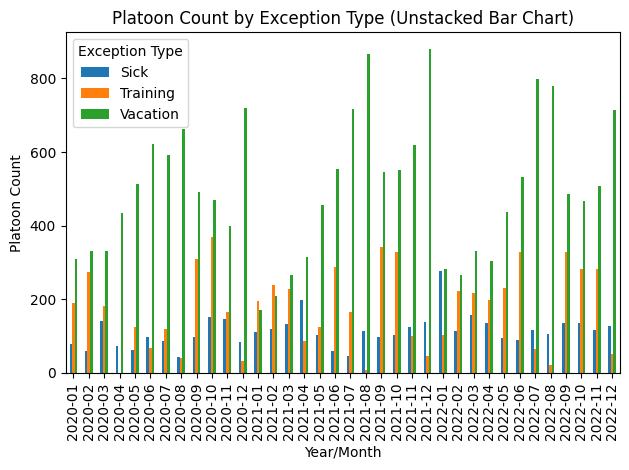

In [12]:
# Create an unstacked bar chart and a line plot from the pivot table

# Unstacked bar chart
absence_pivot.plot(kind='bar', stacked=False)
plt.title('Platoon Count by Exception Type (Unstacked Bar Chart)')
plt.xlabel('Year/Month')
plt.ylabel('Platoon Count')
plt.legend(title='Exception Type')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [13]:
absence_pivot.head()

Exception Type,Sick,Training,Vacation
year_month,,,
2020-01,79,190,309
2020-02,60,275,331
2020-03,142,181,330
2020-04,74,1,434
2020-05,63,125,513


<Figure size 700x500 with 0 Axes>

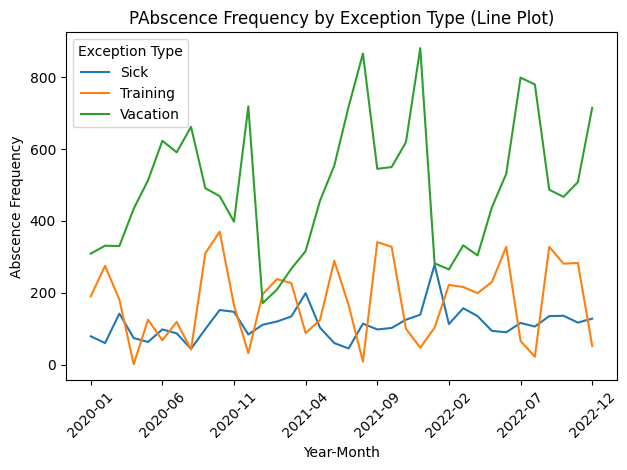

In [14]:
# Line plot
plt.figure(figsize=(7, 5))
absence_pivot.plot(kind='line')
plt.title('PAbscence Frequency by Exception Type (Line Plot)')
plt.xlabel('Year-Month')
plt.ylabel('Abscence Frequency')
plt.legend(title='Exception Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
absence_pivot.head(10)

Exception Type,Sick,Training,Vacation
year_month,,,
2020-01,79,190,309
2020-02,60,275,331
2020-03,142,181,330
2020-04,74,1,434
2020-05,63,125,513
2020-06,98,68,623
2020-07,87,119,591
2020-08,44,42,662
2020-09,99,310,491


## Absence Type Descriptive Stats


In [16]:
# average per day
vacation_mean = round(absence_pivot['Vacation'].mean())
sick_mean = round(absence_pivot['Sick'].mean())
training_mean = round(absence_pivot['Training'].mean())

print(f'On any given day, there is an average of')
print(f'     - {vacation_mean} vacation related absences')
print(f'     - {training_mean} training related absences')
print(f'     - {sick_mean} sick related absences')


On any given day, there is an average of
     - 498 vacation related absences
     - 177 training related absences
     - 113 sick related absences


Vacation has the most amount of absences.

Sick has the least amount of absences.

In [17]:
# spread per day
vacation_std= round(absence_pivot['Vacation'].std())
sick_std = round(absence_pivot['Sick'].std())
training_std = round(absence_pivot['Training'].std())

print(f'On any given month, the spread of absences due to')
print(f'     - vacation is {vacation_std}')
print(f'     - training is {training_std}')
print(f'     - sick is {sick_std}')


On any given month, the spread of absences due to
     - vacation is 187
     - training is 109
     - sick is 44


Standard deviation indicates on a month to month basis, absences due to vacation varies the most, followed by training, and then sick.

In [18]:
absence_pivot.describe()

Exception Type,Sick,Training,Vacation
count,36.000000,36.000000,36.000000
mean,113.444444,176.666667,498.055556
std,43.632520,109.027650,187.325529
min,44.000000,1.000000,171.000000
25%,89.250000,83.000000,330.750000
50%,112.000000,185.500000,489.000000
75%,135.000000,276.500000,620.000000
max,278.000000,370.000000,881.000000


In [19]:
absence_pivot[absence_pivot['Vacation'] > 850]

Exception Type,Sick,Training,Vacation
year_month,,,
2021-08,114,8,866
2021-12,139,47,881


Max num ppl on vacation is 881 

## Officer Analysis

In [20]:
staff_df.head()

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,02,27,Thursday,2020-02
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,02,20,Thursday,2020-02
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,02,19,Wednesday,2020-02
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,03,07,Saturday,2020-03
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,02,28,Friday,2020-02


In [21]:
year_badge = staff_df.groupby(['year', 'Officer Badge #', 'Exception Type']).count()['Platoon'].reset_index()
year_badge.head(100)

,year,Officer Badge #,Exception Type,Platoon
0,2020,11010,Sick,1
1,2020,11010,Training,4
2,2020,11010,Vacation,46
3,2020,11910,Sick,4
4,2020,11910,Training,5
...,...,...,...,...
95,2020,27705,Vacation,31
96,2020,28065,Sick,3
97,2020,28065,Training,11
98,2020,28065,Vacation,35


In [22]:
year_badge = staff_df.groupby(['year', 'Officer Badge #', 'Exception Type']).count()['Platoon'].reset_index()

def officer_details(years=[2020, 2021, 2022], 
                    reasons=['Vacation', 'Training', 'Sick'], 
                    year_badge=year_badge):
    """
    Return the descriptive stats of each year.
    
    year_bade: a group by df by year, badge, and type
    year: year logged
    reason: exception type
    """
    
    for yr in years:
        year = str(yr)
        
        print(f'For the year {year}')
        print()
        for reason in reasons:
            
            # filter for year and reason
            df = year_badge[ (year_badge['year']== year ) & 
                            (year_badge['Exception Type'] == reason)
                           ]

            average = round(df['Platoon'].mean())
            median = df['Platoon'].median()
            std_dev = round(df['Platoon'].std())

            max_num = df['Platoon'].max()
            min_num = df['Platoon'].min()

            print(f'     Reason: {reason}')
            print(f'          Mean absence is {average}')
            print(f'          Median absence is {median}')
            print()
            print(f'          Std Dev absence is {std_dev}')
            print()
            print(f'          Max absence is {max_num}')
            print(f'          Min absence is {min_num}')
            print()
            print()
            print()


In [23]:
officer_details()

For the year 2020

     Reason: Vacation
          Mean absence is 26
          Median absence is 29.0

          Std Dev absence is 10

          Max absence is 55
          Min absence is 1



     Reason: Training
          Mean absence is 10
          Median absence is 7.0

          Std Dev absence is 7

          Max absence is 30
          Min absence is 1



     Reason: Sick
          Mean absence is 7
          Median absence is 5.0

          Std Dev absence is 6

          Max absence is 40
          Min absence is 1



For the year 2021

     Reason: Vacation
          Mean absence is 30
          Median absence is 32.0

          Std Dev absence is 11

          Max absence is 52
          Min absence is 1



     Reason: Training
          Mean absence is 11
          Median absence is 10.0

          Std Dev absence is 8

          Max absence is 36
          Min absence is 1



     Reason: Sick
          Mean absence is 7
          Median absence is 6.0

          Std

## Month Outlier Analysis

In [24]:
sick_df = absence_pivot['Sick'].copy()
Q1 = sick_df.quantile(0.25)
Q3 = sick_df.quantile(0.75)
IQR = Q3 - Q1
sick_df[(sick_df < (Q1 - 1.5 * IQR)) | (sick_df > (Q3 + 1.5 * IQR))]

year_month
2022-01    278
Name: Sick, dtype: int64

In [25]:
Q3 + 1.5 * IQR

203.625

1 outlier

## Trend Analysis

<Figure size 700x500 with 0 Axes>

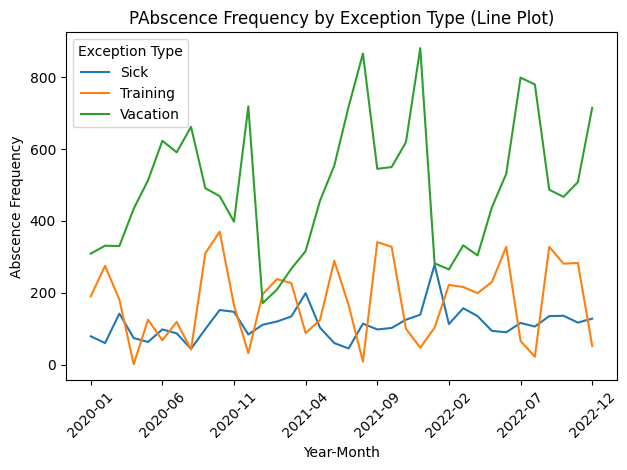

In [26]:
# Line plot
plt.figure(figsize=(7, 5))
absence_pivot.plot(kind='line')
plt.title('PAbscence Frequency by Exception Type (Line Plot)')
plt.xlabel('Year-Month')
plt.ylabel('Abscence Frequency')
plt.legend(title='Exception Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [27]:
def get_top_months(absence_pivot, reason):
    # make a new copy and get values
    absence_reason_months = list(absence_pivot[reason].values.copy())

    # sort list and get top 8 months
    absence_reason_months = sorted(absence_reason_months, reverse=True)
    absence_peaks= absence_reason_months[:8]

    # locate when the peaks occur
    top_months = absence_pivot.loc[absence_pivot[reason].isin(absence_peaks)]
    top_months = top_months[reason]
    
    return top_months

In [28]:
get_top_months(absence_pivot, 'Vacation')

year_month
2020-08    662
2020-12    719
2021-07    718
2021-08    866
2021-12    881
2022-07    799
2022-08    780
2022-12    715
Name: Vacation, dtype: int64

In [29]:
get_top_months(absence_pivot, 'Sick')

year_month
2020-03    142
2020-10    152
2020-11    147
2021-04    199
2021-12    139
2022-01    278
2022-03    157
2022-10    136
Name: Sick, dtype: int64

In [30]:
get_top_months(absence_pivot, 'Training')

year_month
2020-09    310
2020-10    370
2021-06    289
2021-09    341
2021-10    328
2022-06    328
2022-09    328
2022-11    283
Name: Training, dtype: int64

### Correlation

In [31]:
absence_pivot['Vacation'].corr(absence_pivot['Training'])

-0.4447339112449209

In [32]:
absence_pivot['Vacation'].corr(absence_pivot['Sick'])

-0.3102082590482541

In [33]:
absence_pivot['Sick'].corr(absence_pivot['Training'])

-0.01845442220491289

- no correlation between sick and training absences

- Vacation and training absences have a negative low correlation

- vacation and sick absences have a negative low correlation 

--> low correlation is 0.3 < corr < 0.5

## seasonality

In [34]:
# seasonality
def seasonality(date):
    """
    Return the season given the date.

    date: Exception date 
    
    date thresholds are referenced from
    https://www.timeanddate.com/calendar/seasons.html
    """
    date = str(date)
    if date < "2020-03-19":
        return "winter"
    
    elif date < "2020-06-20":
        return "spring"
    
    elif date < "2020-09-22":
        return "summer"
    
    elif date < "2020-12-21":
        return "fall"
    
    elif date < "2021-03-20":
        return "winter"
    
    elif date < "2021-06-20":
        return "spring"
    
    elif date < "2021-09-22":
        return "summer"
    
    elif date < "2021-12-21":
        return "fall"
    
    elif date < "2022-03-20":
        return "winter"
    
    elif date < "2022-06-21":
        return "spring"
    
    elif date < "2022-09-22":
        return "summer"
    
    elif date < "2022-12-21":
        return "fall"
    
    else:
        return "winter"
    

staff_df['season'] = staff_df['Exception Date'].apply(seasonality)

staff_df.head()

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month,season
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,02,27,Thursday,2020-02,winter
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,02,20,Thursday,2020-02,winter
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,02,19,Wednesday,2020-02,winter
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,03,07,Saturday,2020-03,winter
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,02,28,Friday,2020-02,winter


In [35]:
season_type = staff_df.groupby(['season', 'Exception Type']).count().reset_index()
season_pivot = season_type.pivot_table(values='Platoon', index='season', columns='Exception Type', aggfunc='sum')
season_pivot

Exception Type,Sick,Training,Vacation
season,,,
fall,1103,2108,4674
spring,1020,1471,3811
summer,848,1102,6317
winter,1113,1679,3128


In [36]:
staff_df.groupby(['year','season', 'Exception Type']).count()

Platoon  Officer Badge #  Exception Date  \
year season Exception Type                                             
2020 fall   Sick                404              404             404   
            Training            695              695             695   
            Vacation           1376             1376            1376   
     spring Sick                259              259             259   
            Training            183              183             183   
            Vacation           1430             1430            1430   
     summer Sick                234              234             234   
            Training            354              354             354   
            Vacation           1906             1906            1906   
     winter Sick                232              232             232   
            Training            646              646             646   
            Vacation           1158             1158            1158   
2021 fall   Sick                330              330             330   
            Training            642              642             642   
            Vacation           1804             1804            1804   
     spring Sick                411              411             411   
            Training            545              545             545   
            Vacation           1186             1186            1186   
     summer Sick                252              252             252   
            Training            371              371             371   
            Vacation           2249             2249            2249   
     winter Sick                357              357             357   
            Training            594              594             594   
            Vacation            913              913             913   
2022 fall   Sick                369              369             369   
            Training            771              771             771   
            Vacation           1494             1494            1494   
     spring Sick                350              350             350   
            Training            743              743             743   
            Vacation           1195             1195            1195   
     summer Sick                362              362             362   
            Training            377              377             377   
            Vacation           2162             2162            2162   
     winter Sick                524              524             524   
            Training            439              439             439   
            Vacation           1057             1057            1057   

                            Exception Start Time  # of Hours  month   day  \
year season Exception Type                                                  
2020 fall   Sick                             404         404    404   404   
            Training                         695         695    695   695   
            Vacation                        1376        1376   1376  1376   
     spring Sick                             259         259    259   259   
            Training                         183         183    183   183   
            Vacation                        1430        1430   1430  1430   
     summer Sick                             234         234    234   234   
            Training                         354         354    354   354   
            Vacation                        1906        1906   1906  1906   
     winter Sick                             232         232    232   232   
            Training                         646         646    646   646   
            Vacation                        1158        1158   1158  1158   
2021 fall   Sick                             330         330    330   330   
            Training                         642         642    642   642   
            Vacation                        1804        180

<Figure size 700x500 with 0 Axes>

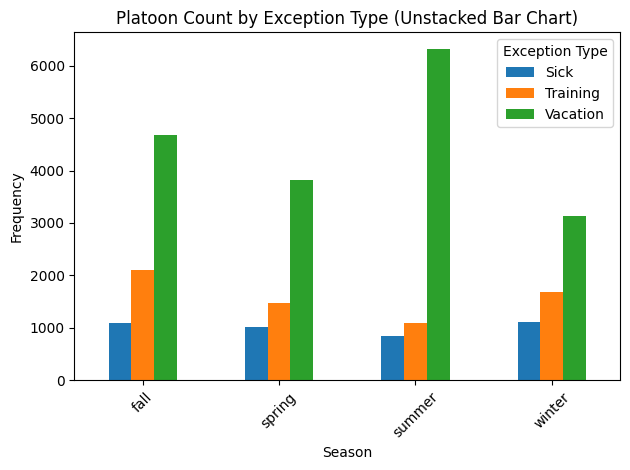

In [37]:
# Unstacked bar chart
plt.figure(figsize=(7, 5))
season_pivot.plot(kind='bar', stacked=False)
plt.title('Platoon Count by Exception Type (Unstacked Bar Chart)')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend(title='Exception Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
day_name_count = staff_df.groupby('day_name').count().reset_index()[['day_name','Platoon']]
day_name_count

,day_name,Platoon
0,Friday,4273
1,Monday,4051
2,Saturday,3697
3,Sunday,3678
4,Thursday,4279
5,Tuesday,4193
6,Wednesday,4203


## Cyclical


Identify:
    - peaks (max)
    - lows  (min)
    - Median
    - Mean

In [39]:
staff_2020 = staff_df[staff_df['year']=='2020']
staff_2020 = staff_2020.groupby(['Exception Date', 'Exception Type']).count()
staff_2020

Platoon  Officer Badge #  Exception Start Time  \
Exception Date Exception Type                                                   
2020-01-01     Sick                  2                2                     2   
               Vacation             24               24                    24   
2020-01-02     Sick                  2                2                     2   
               Training              3                3                     3   
               Vacation             13               13                    13   
...                                ...              ...                   ...   
2020-12-29     Sick                  4                4                     4   
               Vacation             21               21                    21   
2020-12-30     Sick                  3                3                     3   
               Vacation             25               25                    25   
2020-12-31     Vacation             31               31                    31   

                               # of Hours  year  month  day  day_name  \
Exception Date Exception Type                                           
2020-01-01     Sick                     2     2      2    2         2   
               Vacation                24    24     24   24        24   
2020-01-02     Sick                     2     2      2    2         2   
               Training                 3     3      3    3         3   
               Vacation                13    13     13   13        13   
...                                   ...   ...    ...  ...       ...   
2020-12-29     Sick                     4     4      4    4         4   
               Vacation                21    21     21   21        21   
2020-12-30     Sick                     3     3      3    3         3   
               Vacation                25    25     25   25        25   
2020-12-31     Vacation                31    31     31   31        31   

                               year_month  season  
Exception Date Exception Type                      
2020-01-01     Sick                     2       2  
               Vacation                24      24  
2020-01-02     Sick                     2       2  
               Training                 3       3  
               Vacation                13      13  
...                                   ...     ...  
2020-12-29     Sick                     4       4  
               Vacation                21      21  
2020-12-30     Sick                     3       3  
               Vacation                25      25  
2020-12-31     Vacation                31      31  

[936 rows x 10 columns]

In [40]:
cyclical_2020_pivot = staff_2020.pivot_table(values='Platoon', index='Exception Date', columns='Exception Type', aggfunc='sum')
cyclical_2020_pivot

Exception Type,Sick,Training,Vacation
Exception Date,,,
2020-01-01,2.0,NaN,24.0
2020-01-02,2.0,3.0,13.0
2020-01-03,4.0,3.0,12.0
2020-01-04,1.0,2.0,7.0
2020-01-05,4.0,2.0,10.0
...,...,...,...
2020-12-27,3.0,NaN,28.0
2020-12-28,3.0,NaN,30.0
2020-12-29,4.0,NaN,21.0


<Figure size 700x500 with 0 Axes>

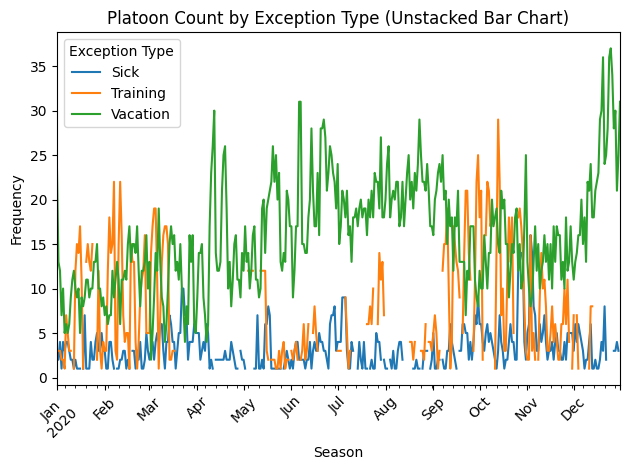

In [41]:
# Unstacked bar chart
plt.figure(figsize=(7, 5))
cyclical_2020_pivot.plot(kind='line')
plt.title('Platoon Count by Exception Type (Unstacked Bar Chart)')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.legend(title='Exception Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## end of cyclical

In [42]:
# sorted
day_name_count.iloc[1], day_name_count.iloc[0] = day_name_count.iloc[0], day_name_count.iloc[1]
day_name_count.iloc[2], day_name_count.iloc[5] = day_name_count.iloc[5], day_name_count.iloc[2]
day_name_count.iloc[3], day_name_count.iloc[6] = day_name_count.iloc[6], day_name_count.iloc[3]
day_name_count.iloc[1], day_name_count.iloc[4] = day_name_count.iloc[4], day_name_count.iloc[1]
day_name_count.iloc[2], day_name_count.iloc[3] = day_name_count.iloc[3], day_name_count.iloc[2]
day_name_count.iloc[1], day_name_count.iloc[3] = day_name_count.iloc[3], day_name_count.iloc[1]
day_name_count

,day_name,Platoon
0,Monday,4051
1,Tuesday,4193
2,Wednesday,4203
3,Thursday,4279
4,Friday,4273
5,Saturday,3697
6,Sunday,3678


<Axes: >

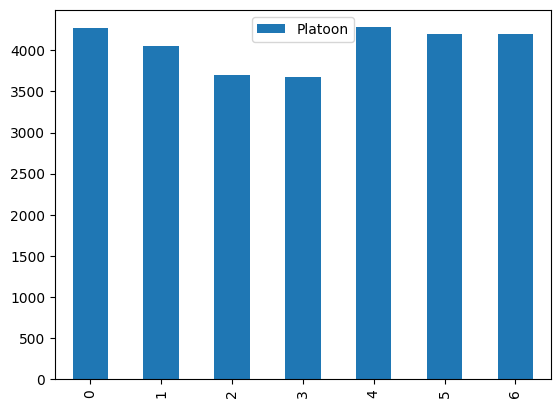

In [43]:
staff_df.groupby('day_name').count().reset_index()[['day_name','Platoon']].plot(kind='bar')

In [44]:
staff_df.dtypes
# date column is not dat time datatype

Platoon                         object
Officer Badge #                  int64
Exception Date          datetime64[ns]
Exception Start Time            object
# of Hours                     float64
Exception Type                  object
year                            object
month                           object
day                             object
day_name                        object
year_month                      object
season                          object
dtype: object

In [45]:
# What are the platoons??
sorted(staff_df['Platoon'].unique())

['4 District A Platoon',
 '4 District B Platoon',
 '4 District C Platoon',
 '4 District D Platoon']

In [46]:
# What are the Exception types?
staff_df['Exception Type'].unique()

array(['Vacation', 'Training', 'Sick'], dtype=object)

In [47]:
staff_df.groupby("Exception Type").count().reset_index()[['Exception Type', 'Officer Badge #']]

,Exception Type,Officer Badge #
0,Sick,4084
1,Training,6360
2,Vacation,17930


<Axes: xlabel='Exception Type'>

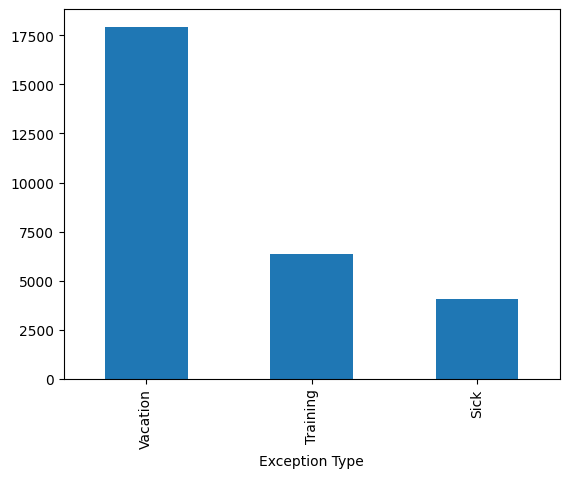

In [48]:
staff_df['Exception Type'].value_counts().plot(kind='bar')

(array([17930.,     0.,     0.,     0.,     0.,  6360.,     0.,     0.,
            0.,  4084.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

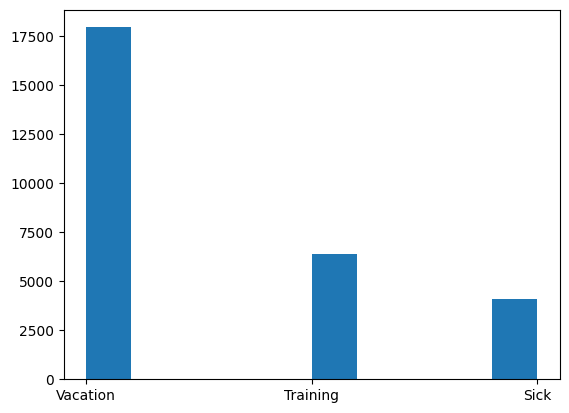

In [49]:
plt.hist(staff_df["Exception Type"])

In [50]:
# number of exceptions by date
staff_df['Exception Date'].value_counts().reset_index()

,Exception Date,count
0,2021-12-31,56
1,2021-10-29,51
2,2021-10-19,47
3,2020-10-13,47
4,2020-10-27,47
...,...,...
1091,2021-01-08,7
1092,2021-01-23,7
1093,2021-04-22,6
1094,2021-01-10,6


In [51]:
staff_df

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month,season
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,02,27,Thursday,2020-02,winter
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,02,20,Thursday,2020-02,winter
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,02,19,Wednesday,2020-02,winter
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,03,07,Saturday,2020-03,winter
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,02,28,Friday,2020-02,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
28369,4 District C Platoon,38160,2022-12-22,18:00:00,12.0,Sick,2022,12,22,Thursday,2022-12,winter
28370,4 District D Platoon,37350,2022-12-22,07:00:00,12.0,Vacation,2022,12,22,Thursday,2022-12,winter
28371,4 District D Platoon,37350,2022-12-30,07:00:00,6.0,Vacation,2022,12,30,Friday,2022-12,winter
28372,4 District D Platoon,37350,2022-12-31,19:00:00,12.0,Vacation,2022,12,31,Saturday,2022-12,winter


In [52]:
staff_df.groupby(['Exception Type']).count()

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,year,month,day,day_name,year_month,season
Exception Type,,,,,,,,,,,
Sick,4084,4084,4084,4084,4084,4084,4084,4084,4084,4084,4084
Training,6360,6360,6360,6360,6360,6360,6360,6360,6360,6360,6360
Vacation,17930,17930,17930,17930,17930,17930,17930,17930,17930,17930,17930


In [53]:
# type of exceptions by date
staff_df.groupby(['Exception Date', 'Exception Type']).count()

# should I categorize the dates by 
    # month, 
        # ensure column is datetime value
    # seaons, 
    # or slicing the months into halves (first half vs second half)
        # issue for this point is readability and importance

Platoon  Officer Badge #  Exception Start Time  \
Exception Date Exception Type                                                   
2020-01-01     Sick                  2                2                     2   
               Vacation             24               24                    24   
2020-01-02     Sick                  2                2                     2   
               Training              3                3                     3   
               Vacation             13               13                    13   
...                                ...              ...                   ...   
2022-12-29     Vacation             23               23                    23   
2022-12-30     Sick                  8                8                     8   
               Vacation             27               27                    27   
2022-12-31     Sick                  1                1                     1   
               Vacation             31               31                    31   

                               # of Hours  year  month  day  day_name  \
Exception Date Exception Type                                           
2020-01-01     Sick                     2     2      2    2         2   
               Vacation                24    24     24   24        24   
2020-01-02     Sick                     2     2      2    2         2   
               Training                 3     3      3    3         3   
               Vacation                13    13     13   13        13   
...                                   ...   ...    ...  ...       ...   
2022-12-29     Vacation                23    23     23   23        23   
2022-12-30     Sick                     8     8      8    8         8   
               Vacation                27    27     27   27        27   
2022-12-31     Sick                     1     1      1    1         1   
               Vacation                31    31     31   31        31   

                               year_month  season  
Exception Date Exception Type                      
2020-01-01     Sick                     2       2  
               Vacation                24      24  
2020-01-02     Sick                     2       2  
               Training                 3       3  
               Vacation                13      13  
...                                   ...     ...  
2022-12-29     Vacation                23      23  
2022-12-30     Sick                     8       8  
               Vacation                27      27  
2022-12-31     Sick                     1       1  
               Vacation                31      31  

[2879 rows x 10 columns]

In [54]:
# staff_df.groupby(['Exception Date', 'Exception Type']).count()['Offer Badge #']


In [55]:
staff_df

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,day_name,year_month,season
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,02,27,Thursday,2020-02,winter
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,02,20,Thursday,2020-02,winter
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,02,19,Wednesday,2020-02,winter
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,03,07,Saturday,2020-03,winter
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,02,28,Friday,2020-02,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
28369,4 District C Platoon,38160,2022-12-22,18:00:00,12.0,Sick,2022,12,22,Thursday,2022-12,winter
28370,4 District D Platoon,37350,2022-12-22,07:00:00,12.0,Vacation,2022,12,22,Thursday,2022-12,winter
28371,4 District D Platoon,37350,2022-12-30,07:00:00,6.0,Vacation,2022,12,30,Friday,2022-12,winter
28372,4 District D Platoon,37350,2022-12-31,19:00:00,12.0,Vacation,2022,12,31,Saturday,2022-12,winter


In [56]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Crime

## There are different priorities of crime,

    1. Emergency, 1
    2. High Priority, 2
    3. Medium Priority, 3
    --> There must be a low priority
    
There are many types of crime. We will generalize the crimes as 

    1. Criminal crime
    2. Non Criminal crime
    
    


In [ ]:
crime_df = pd.read_excel("data/Calls_for_Service_2020-2022.xlsx")
crime_df

In [ ]:
crime_df.dtypes

In [ ]:
crime_df['Call Date'] = pd.to_datetime(crime_df['Call Date'], format='%Y%m%d')
crime_df

In [ ]:
crime_df.dtypes

In [ ]:
crime_df['year'] = crime_df['Call Date'].dt.year
crime_df['month'] = crime_df['Call Date'].dt.month
crime_df['day'] = crime_df['Call Date'].dt.day
crime_df.sample(10)

In [ ]:
crime_df['year'].unique()

In [ ]:
crime_df['District'].unique()

In [ ]:
unknown_dis_sec = crime_df[ 
                            (crime_df['Sector'] == '~') | 
                            (crime_df['Sector'] == '~')
                            ].copy()
unknown_dis_sec

In [ ]:
unknown_dis_sec.shape[0] / crime_df.shape[0] * 100 

# about 1% of the force does not input their district and sector information
    # or this information is lost through some process

In [ ]:
crime_df['Call Date'] = pd.to_datetime(crime_df['Call Date'], format='%Y%m%d').dt.date
crime_df['Call Time (HH:MM:SS)'] = pd.to_datetime(crime_df['Call Time (HH:MM:SS)'], format='%H:%M:%S').dt.time


crime_df

In [ ]:
len(crime_df['Call Type'].unique())

In [ ]:
list(crime_df['Call Type'].unique())

In [ ]:
crime_df.groupby(['District','Sector']).count().reset_index()
# there is only one sector in each district
# There is no combination of ~ with districts and sectors

In [ ]:
sns.histplot(data=crime_df, x="Call Type")
plt.xticks(rotation=90)